In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from src.config import DATA_DIRECTORY


def get_last_ended_action(group):
    """Return the enforcement action with the most recent VIOL_END_DATE"""
    return group.sort_values(by='VIOL_END_DATE', ascending=False).iloc[0]


pd.set_option("display.max_columns", 999)

# Load the table of compliance violations

In [3]:
df = pd.read_csv(DATA_DIRECTORY / 'interim' / 'hr2w_exceedance.csv')

### A sample of violations

In [4]:
df.sample(10)

,REGULATING_AGENCY,WATER_SYSTEM_NUMBER,WATER_SYSTEM_NAME,CLASSIFICATION,POPULATION,SERVICE_CONNECTIONS,COUNTY,CITY,ZIPCODE,VIOLATION_NUMBER,VIOLATION_TYPE_NAME,ANALYTE_NAME,RESULT,MCL,VIOL_BEGIN_DATE,VIOL_END_DATE,ENF_ACTION_NUMBER,ENF_ACTION_ISSUE_DATE,ENF_ACTION_TYPE_ISSUED
1622,DISTRICT 19 - TEHACHAPI,CA1500455,WILLIAM FISHER MEMORIAL WATER COMPANY,COMMUNITY,56,16,KERN,MOJAVE,93501,9912022,"MCL, AVERAGE",ARSENIC,.019 MG/L,0.010 MG/L,2017-04-01,2017-06-30,919028,2009-01-23,FORMAL ENFORCEMENT ACTION ISSUED
2444,DISTRICT 19 - TEHACHAPI,CA1510033,CWS - KERNVILLE,COMMUNITY,2498,2074,KERN,KERNVILLE,93238,119007,"MCL, LRAA",TOTAL HALOACETIC ACIDS (HAA5),0.064 MG/L,0.060 MG/L,2017-04-01,2017-06-30,9419003,2016-10-07,FORMAL ENFORCEMENT ACTION ISSUED
4086,LPA57 - MONTEREY COUNTY,CA2701241,ENCINAL RD WS #01,COMMUNITY,41,18,MONTEREY,SALINAS,93908,1600035,"MCL, SINGLE SAMPLE",NITRATE,18.3 MG/L,10 MG/L,2017-01-01,2017-03-31,1305697,2013-06-10,FORMAL ENFORCEMENT ACTION ISSUED
729,DISTRICT 23 - FRESNO,CA1009027,HARRIS FARMS HEADQUARTERS,COMMUNITY,300,80,FRESNO,COALINGA,93210,1223050,RES DISINFECT CONCENTRATION (SWTR),SWTR,,,2012-08-01,2012-08-31,1323055,2018-02-27,RETURN TO COMPLIANCE
331,DISTRICT 23 - FRESNO,CA1000221,WASHINGTON UNION HIGH SCHOOL,NON-TRANSIENT NON-COMMUNITY,1000,23,FRESNO,FRESNO,93706,1023027,"MCL, AVERAGE",GROSS ALPHA PARTICLE ACTIVITY,22.5 PCI/L,15 PCI/L,2018-01-01,2018-03-31,923005,2013-12-31,FORMAL ENFORCEMENT ACTION ISSUED
371,DISTRICT 23 - FRESNO,CA1000345,PANOCHE WATER DISTRICT,COMMUNITY,146,46,FRESNO,FIREBAUGH,93622,9600009,"MCL, LRAA",TTHM,0.105 MG/L,0.080 MG/L,2015-04-01,2015-06-30,9600072,2017-12-31,RETURN TO COMPLIANCE
3584,LPA57 - MONTEREY COUNTY,CA2700536,CORRAL DE TIERRA ESTATES WC,COMMUNITY,45,16,MONTEREY,SALINAS,93908,1500024,"MCL, AVERAGE",ARSENIC,.072 MG/L,0.010 MG/L,2015-07-01,2015-09-30,1506102,2015-06-18,FORMAL ENFORCEMENT ACTION ISSUED
3224,DISTRICT 11 - MERCED,CA2010007,HILLVIEW WC-OAKHURST/SIERRA LAKES,COMMUNITY,3818,1043,MADERA,OAKHURST,93644,9911024,"MCL, AVERAGE",ARSENIC,0.046 MG/L,0.010 MG/L,2015-01-01,2015-03-31,911021,2009-01-26,FORMAL ENFORCEMENT ACTION ISSUED
5905,DISTRICT 12 - VISALIA,CA5400665,DEL ORO RIVER ISLAND SERV TERR #1,COMMUNITY,1594,442,TULARE,PORTERVILLE,93257,9900010,"MCL, AVERAGE",COMBINED URANIUM,42.4 PCI/L,20 PCI/L,2014-07-01,2014-09-30,1212982,2011-11-18,FORMAL ENFORCEMENT ACTION ISSUED
3990,LPA57 - MONTEREY COUNTY,CA2701221,WASHINGTON SCHOOL WS,NON-TRANSIENT NON-COMMUNITY,250,1,MONTEREY,SALINAS,93908,1600043,"MCL, AVERAGE",ARSENIC,.023 MG/L,.010 MG/L,2016-10-01,2016-12-31,1706235,2016-08-24,FORMAL ENFORCEMENT ACTION ISSUED


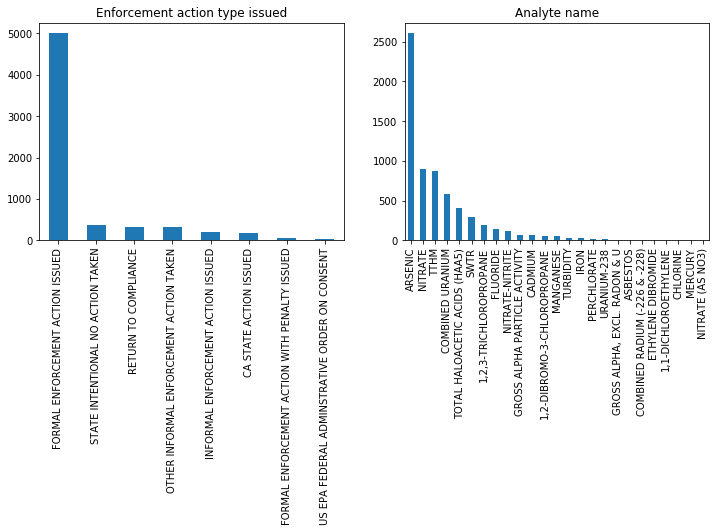

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
df.ENF_ACTION_TYPE_ISSUED.value_counts().plot.bar(title='Enforcement action type issued', ax=axs[0]);
df.ANALYTE_NAME.value_counts().plot.bar(title='Analyte name', ax=axs[1]);

In [6]:
groups = df.groupby(['WATER_SYSTEM_NUMBER', 'ANALYTE_NAME'])
last_ended_action = groups.apply(get_last_ended_action)

## Do not include water system/analyte combinations that ended with a return to compliance

In [7]:
last_ended_action = last_ended_action[last_ended_action.ENF_ACTION_TYPE_ISSUED != 'RETURN TO COMPLIANCE']
last_ended_action.reset_index(drop=True, inplace=True)

In [8]:
groups = last_ended_action.groupby('WATER_SYSTEM_NUMBER')
print(f"{len(groups)} water systems with at least one analyte out of compliance")

330 water systems with at least one analyte out of compliance
